In [1]:

import sys

command_str = '{sys.executable} -m pip install --upgrade opml --quiet'.format(sys=sys)
print(command_str)
!{command_str}

C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade opml --quiet


In [2]:

import opml

print(['opml.{}'.format(fn) for fn in dir(opml) if not fn.startswith('_')])

['opml.Opml', 'opml.OutlineElement', 'opml.from_string', 'opml.lxml', 'opml.parse']


In [4]:

networth_opml = opml.parse('../data/opml/Net_Worth_by_Date.opml')
print(['networth_opml.{}'.format(fn) for fn in dir(networth_opml) if not fn.startswith('_')])
networth_opml?

Type:           Opml
String form:    <opml.Opml object at 0x000001E462A0FDF0>
Length:         35
File:           c:\users\daveb\appdata\roaming\python\python39\site-packages\opml\__init__.py
Docstring:      Python representation of an OPML file.
Init docstring: Initialize the object using the parsed XML tree.

[]


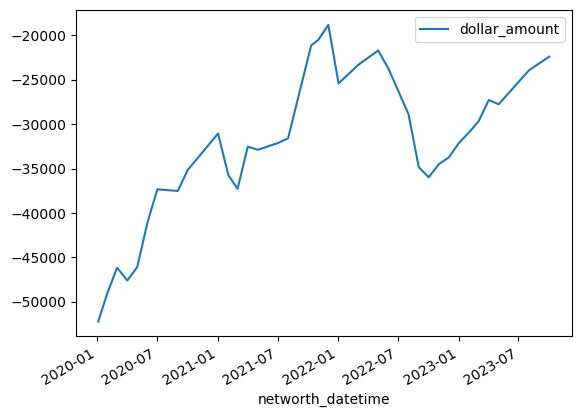

In [5]:

from datetime import datetime
import re
import pandas as pd

format_str = '%A, %B %d, %Y'
rows_list = []
for el in networth_opml:
    row_dict = {}
    date_str = el.text
    networth_datetime = datetime.strptime(date_str, format_str)
    row_dict['networth_datetime'] = networth_datetime
    dollar_str = el._note
    dollar_amount = float(re.sub('[$,]+', '', dollar_str))
    row_dict['dollar_amount'] = dollar_amount
    rows_list.append(row_dict.copy())
networth_df = pd.DataFrame(rows_list)
networth_df.plot.line(x='networth_datetime', y='dollar_amount');

In [11]:

sorted([f'el.{fn}' for fn in dir(el)])

['el.__class__',
 'el.__delattr__',
 'el.__dict__',
 'el.__dir__',
 'el.__doc__',
 'el.__eq__',
 'el.__format__',
 'el.__ge__',
 'el.__getattr__',
 'el.__getattribute__',
 'el.__getitem__',
 'el.__gt__',
 'el.__hash__',
 'el.__init__',
 'el.__init_subclass__',
 'el.__le__',
 'el.__len__',
 'el.__lt__',
 'el.__module__',
 'el.__ne__',
 'el.__new__',
 'el.__reduce__',
 'el.__reduce_ex__',
 'el.__repr__',
 'el.__setattr__',
 'el.__sizeof__',
 'el.__str__',
 'el.__subclasshook__',
 'el.__weakref__',
 'el._outlines',
 'el._root']

In [16]:

dir(el._root)

['__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '_init',
 'addnext',
 'addprevious',
 'append',
 'attrib',
 'base',
 'clear',
 'cssselect',
 'extend',
 'find',
 'findall',
 'findtext',
 'get',
 'getchildren',
 'getiterator',
 'getnext',
 'getparent',
 'getprevious',
 'getroottree',
 'index',
 'insert',
 'items',
 'iter',
 'iterancestors',
 'iterchildren',
 'iterdescendants',
 'iterfind',
 'itersiblings',
 'itertext',
 'keys',
 'makeelement',
 'nsmap',
 'prefix',
 'remove',
 'replace',
 'set',
 'sourceline',
 'tag',
 'tail',
 'text',
 'values',
 'xpath']